## COMP40370 Practical 1

DATA EXPLORATION AND PREPROCESSING (Part B)

In [56]:
import pandas as pd
import numpy as np
from sklearn import svm
import os
import sys
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import scipy as sp
from sklearn.model_selection import train_test_split
from math import sqrt
from sklearn.metrics import mean_squared_error

Load 2 seperate Dataframes with 2 csv file.

In [57]:
df1 = pd.read_csv('diabetes1.csv')
df1.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72.0,35,0,33.6,0.627,50,1
1,1,85,66.0,29,0,26.6,0.351,31,0
2,8,183,64.0,0,0,23.3,0.672,32,1
3,1,89,66.0,23,94,28.1,0.167,21,0
4,0,137,40.0,35,168,43.1,2.288,15,1


In [58]:
df2 = pd.read_csv('ages.csv')
df2.head(5)

,Age,AgeGroup
0,1,Children
1,2,Children
2,3,Children
3,4,Children
4,5,Children


## Question 1: Outliers removal and transformation

a. What are the kurtosis and skewness values of the Insulin attribute?

In [59]:
df1['Insulin'].skew()

2.268393486537506

In [60]:
df1['Insulin'].kurtosis()

7.265911343503076

b. Filter the dataframe and select only the rows where Insulin is not equal to 0

In [61]:
filtered_df = df1[df1['Insulin'] != 0]
filtered_df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
3,1,89,66.0,23,94,28.1,0.167,21,0
4,0,137,40.0,35,168,43.1,2.288,15,1
6,3,78,50.0,32,88,31.0,0.248,26,1
8,2,197,70.0,45,543,30.5,0.158,53,1
13,1,189,60.0,23,846,30.1,0.398,59,1
...,...,...,...,...,...,...,...,...,...
778,2,129,74.0,26,205,33.2,0.591,25,0
781,1,140,74.0,26,180,24.1,0.828,23,0
782,1,144,82.0,46,180,46.1,0.335,46,1
785,2,121,70.0,32,95,39.1,0.886,23,0


c. Draw the histogram of Insulin column along with kernel density estimation (KDE) curb.

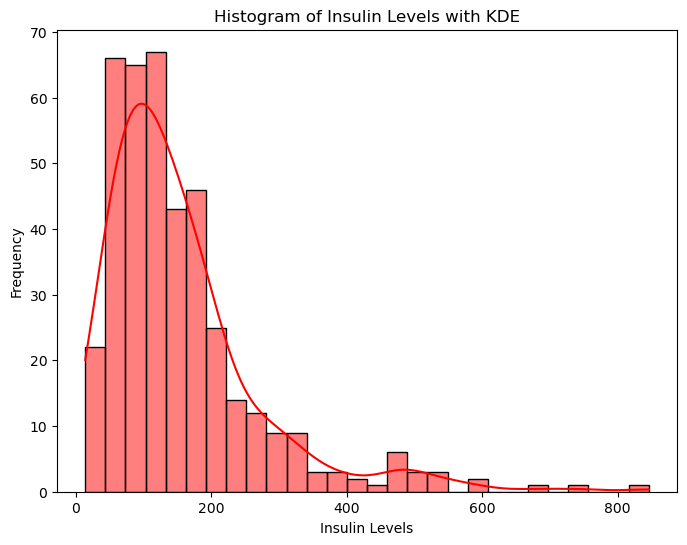

In [62]:
plt.figure(figsize=(8, 6))
sns.histplot(data=filtered_df, x='Insulin', kde=True, color='red')
plt.xlabel('Insulin Levels')
plt.ylabel('Frequency')
plt.title('Histogram of Insulin Levels with KDE')
plt.show()

d. Identify outliers of Insulin using Inter Quartile Range (IQR) approach and impute them with
min and max values appropriately. Then draw the histogram again to observe the difference

In [63]:
Q1 = filtered_df['Insulin'].quantile(0.25)
Q3 = filtered_df['Insulin'].quantile(0.75)
iqr = Q3-Q1
print(f'Interquartile Range (IQR): {iqr}')

Interquartile Range (IQR): 113.0


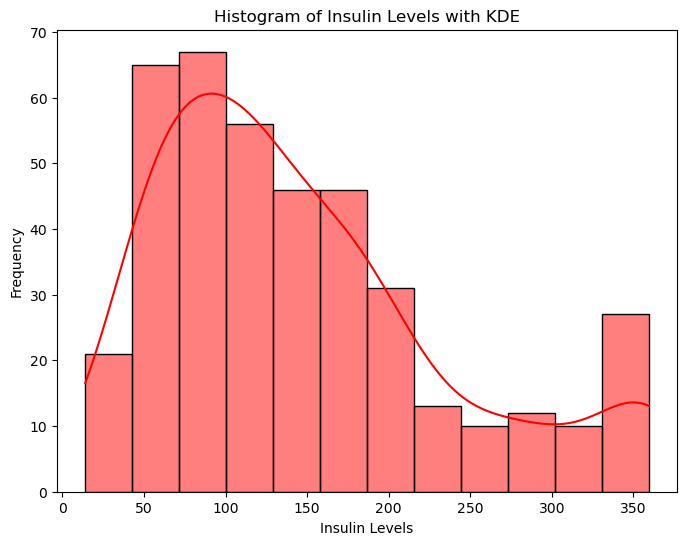

In [64]:
lower_bound = Q1 - 1.5 * iqr
upper_bound = Q3 + 1.5 * iqr
outliers = filtered_df[(filtered_df['Insulin'] < lower_bound) | (filtered_df['Insulin'] > upper_bound)]
filtered_df.loc[filtered_df['Insulin'] < lower_bound, 'Insulin'] = lower_bound
filtered_df.loc[filtered_df['Insulin'] > upper_bound, 'Insulin'] = upper_bound
plt.figure(figsize=(8, 6))
sns.histplot(data=filtered_df, x='Insulin', kde=True, color='red')
plt.xlabel('Insulin Levels')
plt.ylabel('Frequency')
plt.title('Histogram of Insulin Levels with KDE')
plt.show()

In [65]:
outliers.shape

(25, 9)

e.Transform Insulin column using loge (x+1) formula to make the Insulin values follow the normal
distribution.

/var/folders/8d/_9zyyhjn6cn7qy_8qqjt15cm0000gn/T/ipykernel_14604/3468122585.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['Insulin_transformed'] = np.log1p(filtered_df['Insulin'])


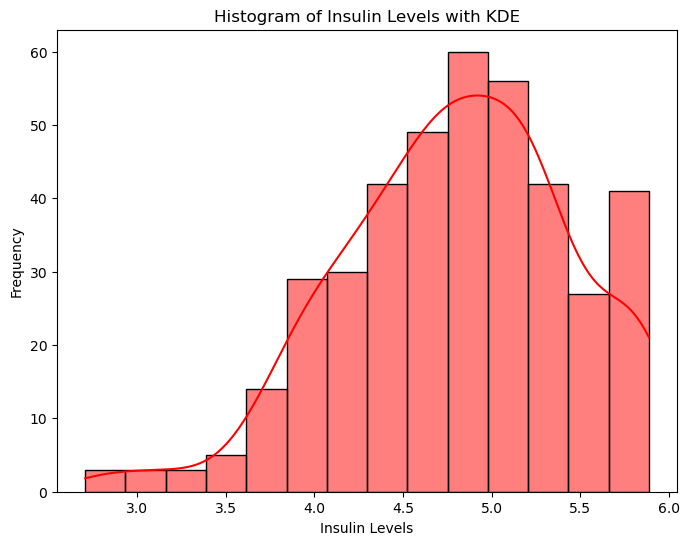

In [66]:
filtered_df['Insulin_transformed'] = np.log1p(filtered_df['Insulin'])
plt.figure(figsize=(8, 6))
sns.histplot(data=filtered_df, x='Insulin_transformed', kde=True, color='red')
plt.xlabel('Insulin Levels')
plt.ylabel('Frequency')
plt.title('Histogram of Insulin Levels with KDE')
plt.show()

f. Find the kurtosis and skewness of Insulin after the transformation

In [67]:
filtered_df['Insulin_transformed'].skew()

-0.39424325557435635

In [68]:
filtered_df['Insulin_transformed'].kurtosis()

0.04668578356986641

g. Use a QQ-plot to compare before and after the loge (x+1) transformation for Insulin column.

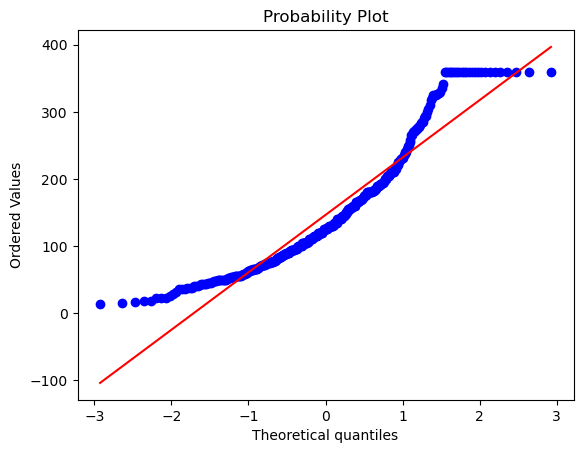

In [69]:
import pylab 
import scipy.stats as stats
stats.probplot(filtered_df['Insulin'], dist="norm", plot=pylab)
pylab.show()

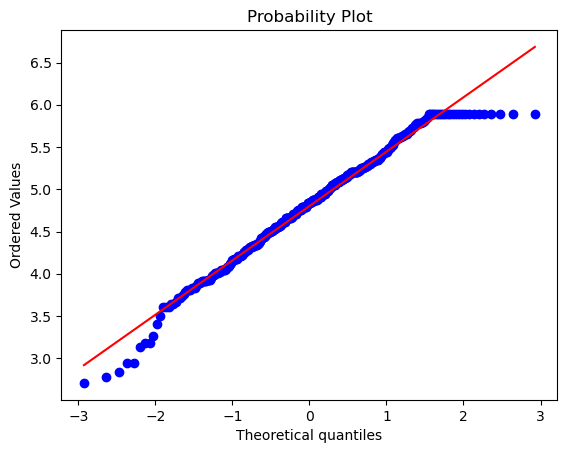

In [70]:
stats.probplot(filtered_df['Insulin_transformed'], dist="norm", plot=pylab)
pylab.show()

h. Similarly detect and correct outliers in the 'Glucose','BloodPressure' and 'SkinThickness'
columns.

In [71]:
Q1 = filtered_df['Glucose'].quantile(0.25)
Q3 = filtered_df['Glucose'].quantile(0.75)
iqr = Q3-Q1
print(f'Interquartile Range (IQR) for "Glucose" : {iqr}')

Interquartile Range (IQR) for "Glucose" : 44.0


In [72]:
lower_bound = Q1 - 1.5 * iqr
upper_bound = Q3 + 1.5 * iqr
outliers = filtered_df[(filtered_df['Glucose'] < lower_bound) | (filtered_df['Glucose'] > upper_bound)]
filtered_df.loc[filtered_df['Glucose'] < lower_bound, 'Glucose'] = lower_bound
filtered_df.loc[filtered_df['Glucose'] > upper_bound, 'Glucose'] = upper_bound

In [73]:
Q1 = filtered_df['BloodPressure'].quantile(0.25)
Q3 = filtered_df['BloodPressure'].quantile(0.75)
iqr = Q3-Q1 
print(f'Interquartile Range (IQR) for "BloodPressure" : {iqr}')

Interquartile Range (IQR) for "BloodPressure" : 16.0


In [74]:
lower_bound = Q1 - 1.5 * iqr
upper_bound = Q3 + 1.5 * iqr
outliers = filtered_df[(filtered_df['BloodPressure'] < lower_bound) | (filtered_df['BloodPressure'] > upper_bound)]
filtered_df.loc[filtered_df['BloodPressure'] < lower_bound, 'BloodPressure'] = lower_bound
filtered_df.loc[filtered_df['BloodPressure'] > upper_bound, 'BloodPressure'] = upper_bound

In [75]:
Q1 = filtered_df['SkinThickness'].quantile(0.25)
Q3 = filtered_df['SkinThickness'].quantile(0.75)
iqr = Q3-Q1
print(f'Interquartile Range (IQR) for "SkinThickness" : {iqr}')

Interquartile Range (IQR) for "SkinThickness" : 16.0


In [76]:
lower_bound = Q1 - 1.5 * iqr
upper_bound = Q3 + 1.5 * iqr
outliers = filtered_df[(filtered_df['SkinThickness'] < lower_bound) | (filtered_df['SkinThickness'] > upper_bound)]
filtered_df.loc[filtered_df['SkinThickness'] < lower_bound, 'SkinThickness'] = lower_bound
filtered_df.loc[filtered_df['SkinThickness'] > upper_bound, 'SkinThickness'] = upper_bound
outliers

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Insulin_transformed
445,0,180,78.0,63,14.0,59.4,2.42,25,1,2.70805


i.Display the correlation matrix using the seaborn heatmap function between continuous
variables; Pregnancies, Glocose, BloodPressure, SkinThickness, Insulin, BMI, Age.

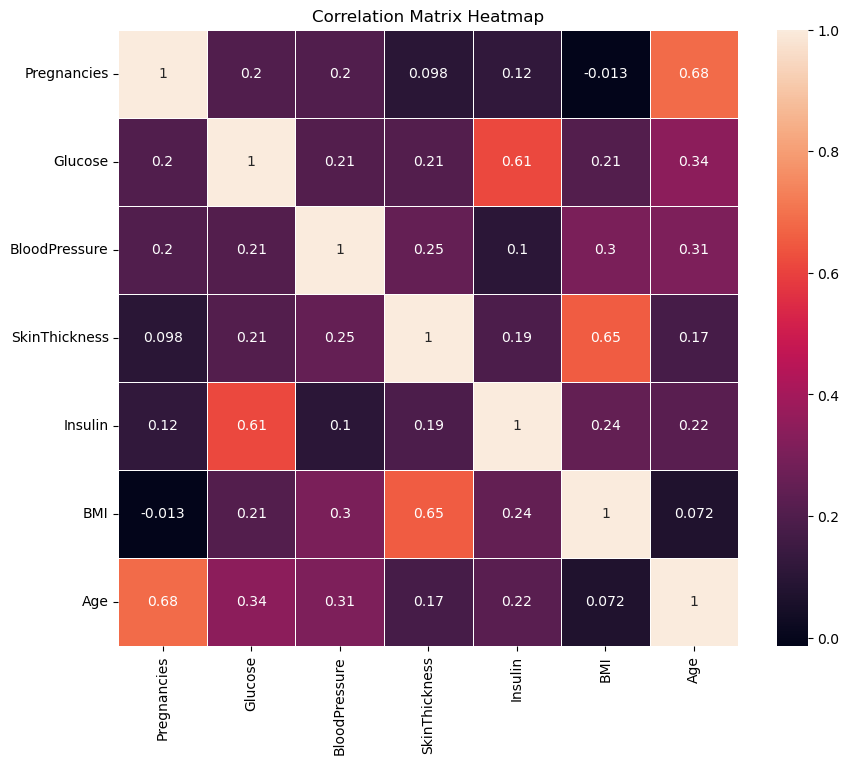

In [77]:
plt.figure(figsize=(10, 8))
sns.heatmap(filtered_df[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'Age']].corr(), annot=True, linewidths=.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

## Question 2: Data processing

a. Group the patients by number of pregnancies, along with their average BloodPressure.

In [78]:
filtered_df.groupby('Pregnancies')['BloodPressure'].mean().reset_index()

,Pregnancies,BloodPressure
0,0,73.263158
1,1,68.468085
2,2,66.107692
3,3,70.177778
4,4,70.458333
5,5,73.300000
6,6,67.052632
7,7,72.476190
8,8,78.285714
9,9,80.666667


b. Group the patients by number of pregnancies, along with the average age, sum of all ages in
that group, and the count of patients in that group


In [79]:
filtered_df.groupby('Pregnancies')['Age'].agg(['mean','sum','count']).reset_index()

,Pregnancies,mean,sum,count
0,0,24.258621,1407,58
1,1,27.122449,2658,98
2,2,25.194030,1688,67
3,3,28.244444,1271,45
4,4,30.407407,821,27
5,5,34.666667,728,21
6,6,38.368421,729,19
7,7,42.761905,898,21
8,8,44.714286,626,14
9,9,46.583333,559,12


c. Add a new column named ‘BMI/Age’ with the value of BMI over the Age, without using any
loops.

In [80]:
filtered_df['BMI/Age'] = filtered_df['BMI']/filtered_df['Age']

/var/folders/8d/_9zyyhjn6cn7qy_8qqjt15cm0000gn/T/ipykernel_14604/2231514930.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['BMI/Age'] = filtered_df['BMI']/filtered_df['Age']


d. Without looping the rows, add a new column named ‘risk’ with the following rules:  
     a. High: if BMI > 45 and BloodPressure > 100  
     b. Medium: if 30 < BMI < 45 and BloodPressure < 100  
     c. Low: if BMI < 30  
     d. Unknown: otherwise

In [81]:
filtered_df['risk'] = 'Unknown'
filtered_df.loc[(filtered_df['BMI'] > 45) & (filtered_df['BloodPressure'] > 100), 'risk'] = 'High'
filtered_df.loc[(30 < filtered_df['BMI']) & (filtered_df['BMI'] < 45) & (filtered_df['BloodPressure'] < 100), 'risk'] = 'Medium'
filtered_df.loc[filtered_df['BMI'] < 30, 'risk'] = 'Low'

/var/folders/8d/_9zyyhjn6cn7qy_8qqjt15cm0000gn/T/ipykernel_14604/1078664258.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['risk'] = 'Unknown'


e. The file named ages.csv provides the age group names. Merge the two dataframes by the age,
the resulted dataframe must contain all the columns of diabetes.csv, in addition to their age group in the column named ‘AgeGroup’.

In [82]:
filtered_df = filtered_df.merge(df2[['Age', 'AgeGroup']], on='Age', how='left')
filtered_df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Insulin_transformed,BMI/Age,risk,AgeGroup
0,1,89,66.0,23,94.0,28.1,0.167,21,0,4.553877,1.338095,Low,Adult
1,0,137,40.0,35,168.0,43.1,2.288,15,1,5.129899,2.873333,Medium,Adolescent
2,3,78,50.0,32,88.0,31.0,0.248,26,1,4.488636,1.192308,Medium,Adult
3,2,197,70.0,45,359.5,30.5,0.158,53,1,5.887492,0.575472,Medium,Adult
4,1,189,60.0,23,359.5,30.1,0.398,59,1,5.887492,0.510169,Medium,Adult
...,...,...,...,...,...,...,...,...,...,...,...,...,...
399,2,129,74.0,26,205.0,33.2,0.591,25,0,5.327876,1.328000,Medium,Adult
400,1,140,74.0,26,180.0,24.1,0.828,23,0,5.198497,1.047826,Low,Adult
401,1,144,82.0,46,180.0,46.1,0.335,46,1,5.198497,1.002174,Unknown,Adult
402,2,121,70.0,32,95.0,39.1,0.886,23,0,4.564348,1.700000,Medium,Adult


f. one-hot encode the categorical variable ‘AgeGroup’ and add the resulting columns to diabetes.cvs, and remove AgeGroup.

In [83]:
encoded_agegroup = pd.get_dummies(filtered_df['AgeGroup'], prefix='AgeGroup')
final_df = pd.concat([filtered_df, encoded_agegroup], axis=1)
final_df.drop('AgeGroup', axis=1, inplace=True)
final_df.to_csv('diabetes_updated.csv', index=False)